# A* Search （1 point）

* Review `AI_Lec01.pdf` **P36**, apply A* search to solve the problem in **P30**.Implement A* search in python.
* Use straight line distance as h(n) function
* A* Search Pseudo-code:

<img src="./p1.png" alt="p1.png" style="zoom: 40%;" />

* Test case:

<img src="./p2.png" alt="p2.png" style="zoom: 25%;" />

* Read the file in the folder ```testcases``` and build a weighed directed-graph. When reading nodes from the file, the first node is the start node and the last node is the end node.

### Input: a file
`
input file description:
A T Z O L D S R C F P B =>names of all nodes, the first one is start node, the last one is end node
421 409 432 435 357 171 215 156 183 140 108 0 => distances from each node to end node
15                  =>total number of edges, next N lines are edges
A Z 75              =>(Start,End,Weight) means an edge from node'A'to node'Z' with weight 75 
A S 140             =>an edge from node'A'to node'S' with weight 140 
A T 118             =>an edge from node'A'to node'T' with weight 118
T L 70              =>an edge from node'T'to node'L' with weight 70
Z O 71              =>an edge from node'Z'to node'O' with weight 71
O S 151             =>an edge from node'O'to node'S' with weight 151
L D 145             =>an edge from node'L'to node'D' with weight 145 
D C 120             =>an edge from node'D'to node'C' with weight 120
S R 80              =>an edge from node'S'to node'R' with weight 80
S F 99              =>an edge from node'S'to node'F' with weight 99 
R P 97              =>an edge from node'R'to node'P' with weight 97
R C 146             =>an edge from node'R'to node'C' with weight 146
C P 138             =>an edge from node'C'to node'P' with weight 138 
F B 211             =>an edge from node'F'to node'B' with weight 211
P B 101             =>an edge from node'P'to node'B' with weight 101
-1.9 0.9 -1.9 -0.3 -1.8 1.5 -1.6 2.1 -1 -0.7 -0.9 -1.6 -0.7 0.6 -0.4 -0.2 0 -1.8 0.6 0.3 0.75 -0.8 2 -1.5
Positions in visualization (x,y)
-1.9 0.9 means node'A' position at (-1.9,0.9)
-1.9 -0.3 means node 'T' position at (-1.9,-0.3)
`
### Output
do not need to return, but don't forget to **yield** the list queue in function `AStarSearch`


### DDL: 22:00, Oct.13
The practice will be checked in this lab class or the next lab class(before **Oct.13**) by teachers or SAs. 
#### What will be tested: 
* That you understand every line of your code, not just copy from somewhere 
* That your program compiles correctly
* Correctness of the program logic 
* That the result is obtained in a reasonable time 

#### Grading: 
* Submissions in this lab class: 1.1 points.
* Submissions on time: 1 point.
* Late submissions within 2 weeks after the deadline (Oct.13) : 0.8 points.


In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# networkx version 2.3 (pip install networkx)
# matplotlib version 2.2.3
# !!! When dealing with nodes under the same distance/situation, pop them by alphabet order
# eg.When AStar Search faces with A and B with same distance, pop A first then pop B
# Modify any code you want to modify, try to make your hands dirty.
# Author Jimmy Gao


def vis(colors, position, G):
    fig, ax = plt.subplots()
    edge_labels = dict([((u, v,), d['weight']) for u, v, d in G.edges(data=True)])
    nx.draw(G, pos=position, with_labels=True, node_color=colors)  # get positions
    nx.draw_networkx_edge_labels(G, position, edge_labels=edge_labels)  # draw edge
    ax.xaxis.set_major_locator(plt.NullLocator())  # delete x axis
    ax.yaxis.set_major_locator(plt.NullLocator())  # delete y axis
    plt.show()

In [4]:
"""
Write your AStar Searh in python and get familar with python dictionary structure

Args:
- Graph: a node dict contains all edges and their weights. keys are nodes' names. values are tuple (End_node,weight).
------ eg: Graph["S"]:[('R', '80'), ('F', '99')]
------ means there is an edge from S to R with weight 80 and an edge from S to F with weight 99
- start: start node in graph
- end: end node in graph
- distances: straight line distance dict from each node to end node
------ eg: distances["S"]: 20.0
------ means the straight line distance from node S to end node is 20.0
Returns:
- do not need to return,but don't forget to yield the list queue
------ eg. queue:['S']
"""
def AStarSearch(Graph,start,end,distances):
    import heapq
    
    queue = []
    pri = []
    visited = []
    heapq.heappush(pri, (0 + distances[start], 0, start))
    queue.append(start)
    visited.append(start)
    # Initialize queue here
    while len(pri) > 0:
        total, cost, cur = heapq.heappop(pri)
        yield queue  # yield queue whenever before an element popped out from the queue
        queue.remove(cur)

        if cur == end:
            yield queue
            break

        for e, w in Graph[cur]:
            if e not in visited:
                new_cost = cost + w
                heapq.heappush(pri, (new_cost + distances[e], new_cost, e))
                queue.append(e)
                visited.append(e)

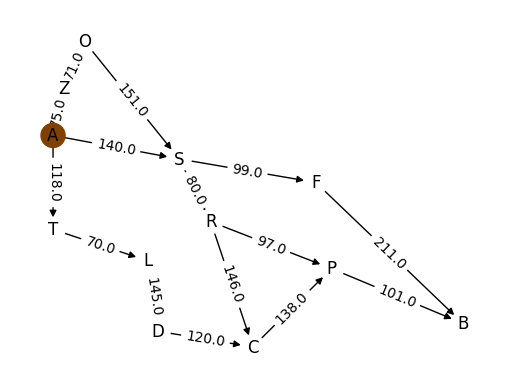

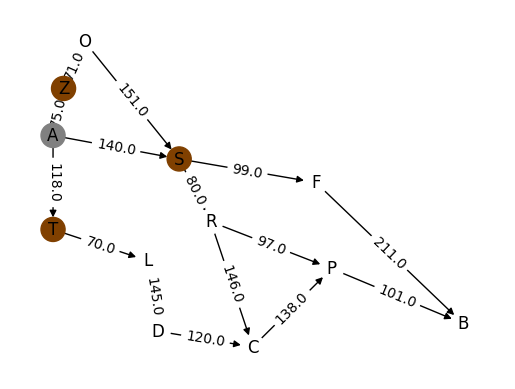

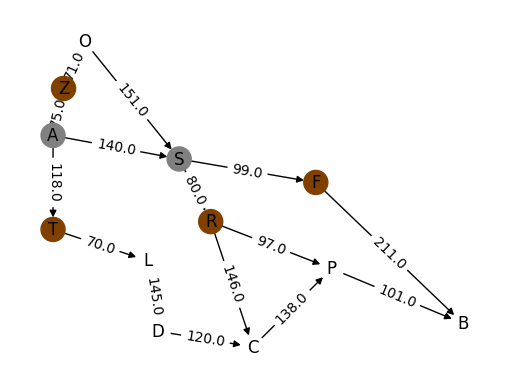

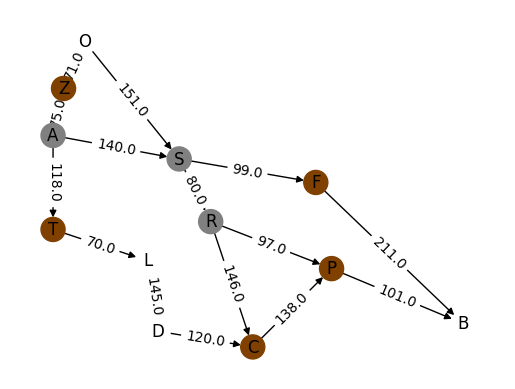

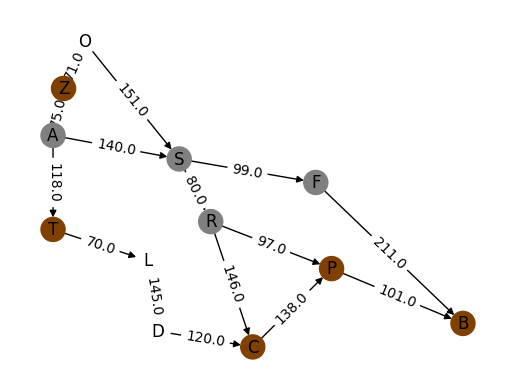

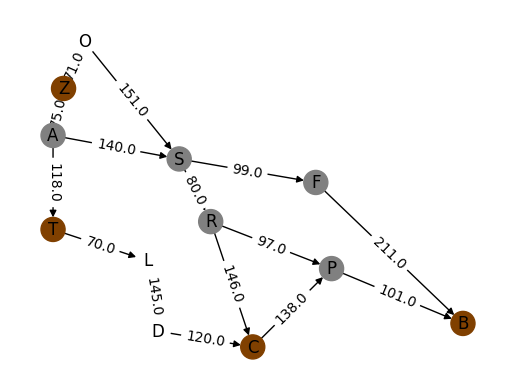

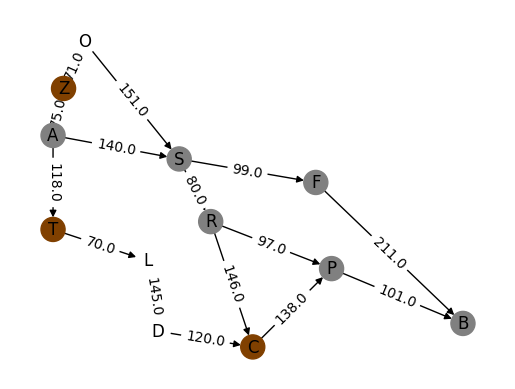

['A', 'S', 'R', 'F', 'P', 'B']


In [5]:
# test block
test_case = 1
G = nx.DiGraph()  # for visualization
position = {}
result = []

# read file
distances={}
with open(f'./test_cases/{test_case}.txt', 'r') as f:
    line = f.readline()
    all_nodes = line.strip().split(" ")
    line = f.readline()
    dis=line.strip().split(" ")
    for i in range(len(all_nodes)):
        distances[all_nodes[i]]=float(dis[i])
    line=f.readline()
    for i in range(int(line)):
        line = f.readline()
        edge = line.strip().split(" ")
        G.add_edge(edge[0], edge[1], weight=float(edge[2]))
    pos = f.readline().strip().split(" ")
    for i in range(len(all_nodes)):
        position[all_nodes[i]] = (float(pos[i * 2]), float(pos[2 * i + 1]))
Graph = dict([(u, []) for u, v, d in G.edges(data=True)])
for u, v, d in G.edges(data=True):
    Graph[u].append((v, d["weight"]))
for node in G:
    if node not in Graph.keys():
        Graph[node]=[]
# Visualization
gray = (0.5, 0.5, 0.5)
brown = (0.5, 0.25, 0)
white = (1, 1, 1)
colors_list = [(_i, white) for _i in G.nodes]
colors_dict = dict(colors_list)
start=all_nodes[0]
end=all_nodes[-1]
res = AStarSearch(Graph,start,end,distances)
q = next(res)
temp_q=[]
last_q=q.copy()
last_node = None
while True:
    try:
        for node in G.nodes:
            if node in q and colors_dict[node] == white:
                colors_dict[node] = brown
            elif node not in q and colors_dict[node] == brown:
                colors_dict[node] = gray
                result.append(node)
        nodes, colors = zip(*colors_dict.items())
        vis(colors, position, G)
        if white not in colors:
            last_node = q[0]
        q = next(res)
        temp_q=last_q.copy()
        last_q=q.copy()
        if end in temp_q and end not in q:
            last_node=end
            break
    except StopIteration:
        break
for node in G.nodes:
    if node == last_node:
        colors_dict[node] = gray
result.append(last_node)
nodes, colors = zip(*colors_dict.items())
vis(colors, position, G)
print(result)